В нашем проекте мы используем данные из двух датасетов [Student Performance Data Set](https://www.kaggle.com/larsen0966/student-performance-data-set) (Успеваемость учащихся в средних школах двух португальских школ.)  и [Students Performance in Exams ] (https://www.kaggle.com/spscientist/students-performance-in-exams) (Оценки, полученные учащимися по разным предметам).

Задача, которую нам нужно решить - **прогнозирование успеваемости студентов**.



# Загрузка данных


Подключаем нужные нам для работы библиотеки, скачиваем датасет:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student-por.xlsx to student-por (1).xlsx


Загрузим данные из .xslx файла и ознакомимся с данными:


In [ ]:
data = pd.read_excel('student-por.xlsx')
data.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        4   0  11  11
1       GP   F   17       U     GT3       T  ...     1       3        2   9  11  11
2       GP   F   15       U     LE3       T  ...     3       3        6  12  13  12
3       GP   F   15       U     GT3       T  ...     1       5        0  14  14  14
4       GP   F   16       U     GT3       T  ...     2       5        0  11  13  13
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
644     MS   F   19       R     GT3       T  ...     2       5        4  10  11  10
645     MS   F   18       U     LE3       T  ...     1       1        4  15  15  16
646     MS   F   18       U     GT3       T  ...     1       5        6  11  12   9
647     MS   M   17       U     LE3       T  ...     4       2        6  10  10  10
648     MS   M   18       R     LE3       T  .


**sex** - student's sex (binary: 'F' - female or 'M' - male)

**age** - student's age (numeric: from 15 to 22)

**address** - student's home address type (binary: 'U' - urban or 'R' - rural)

**famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

**Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

**Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

**Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

**Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

**guardian** - student's guardian (nominal: 'mother', 'father' or 'other')

**traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

**studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

**failures** - number of past class failures (numeric: n if 1<=n<3, else 4)

**schoolsup** - extra educational support (binary: yes or no)

**famsup** - family educational support (binary: yes or no)

**paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

**activities** - extra-curricular activities (binary: yes or no)

**nursery** - attended nursery school (binary: yes or no)

**higher** - wants to take higher education (binary: yes or no)

**internet** - Internet access at home (binary: yes or no)

**romantic** - with a romantic relationship (binary: yes or no)

**famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

**freetime** - free time after school (numeric: from 1 - very low to 5 - very high)

**goout** - going out with friends (numeric: from 1 - very low to 5 - very high)

**Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

**Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

**health** - current health status (numeric: from 1 - very bad to 5 - very good)

**absences**
 - number of school absences (numeric: from 0 to 93)

**G1** - first period grade (numeric: from 0 to 20)

**G2** - second period grade (numeric: from 0 to 20)

**G3** - final grade (numeric: from 0 to 20, output target)












https://datastudio.google.com/s/ppS2r2_II24

In [ ]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Проверяем данные на наличие пустых значений - таких не найдено.

# Мультиколлинеарность


Посчитаем коэффициенты корреляции между колонками таблицы:

In [ ]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


In [ ]:
data.corr().style.format("{:.2}").background_gradient(cmap='coolwarm', axis=1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.0,-0.11,-0.12,0.034,-0.0084,0.32,-0.021,-0.0049,0.11,0.13,0.086,-0.0088,0.15,-0.17,-0.11,-0.11
Medu,-0.11,1.0,0.65,-0.27,0.097,-0.17,0.024,-0.02,0.0095,-0.007,-0.02,0.0046,-0.0086,0.26,0.26,0.24
Fedu,-0.12,0.65,1.0,-0.21,0.05,-0.17,0.02,0.0068,0.028,6.1e-05,0.038,0.045,0.03,0.22,0.23,0.21
traveltime,0.034,-0.27,-0.21,1.0,-0.063,0.098,-0.0095,0.00094,0.057,0.093,0.057,-0.048,-0.0081,-0.15,-0.15,-0.13
studytime,-0.0084,0.097,0.05,-0.063,1.0,-0.15,-0.0041,-0.069,-0.075,-0.14,-0.21,-0.056,-0.12,0.26,0.24,0.25
failures,0.32,-0.17,-0.17,0.098,-0.15,1.0,-0.063,0.11,0.045,0.11,0.082,0.036,0.12,-0.38,-0.39,-0.39
famrel,-0.021,0.024,0.02,-0.0095,-0.0041,-0.063,1.0,0.13,0.09,-0.076,-0.094,0.11,-0.09,0.049,0.09,0.063
freetime,-0.0049,-0.02,0.0068,0.00094,-0.069,0.11,0.13,1.0,0.35,0.11,0.12,0.085,-0.019,-0.094,-0.11,-0.12
goout,0.11,0.0095,0.028,0.057,-0.075,0.045,0.09,0.35,1.0,0.25,0.39,-0.016,0.085,-0.074,-0.079,-0.088
Dalc,0.13,-0.007,6.1e-05,0.093,-0.14,0.11,-0.076,0.11,0.25,1.0,0.62,0.059,0.17,-0.2,-0.19,-0.2


**Признаки которые сильно коррелируют:**

1) Образование матери и образование отца 

2) Употребление алкоголя в выходные дни и в будни

3) Все оценки коррелируют между собой 

Если корреляция между признаками по модулю высокая, они будут "мешаться" друг другу при обучении линейной модели, потому что вносят похожую информацию. Из набора нескольких коррелирующих признаков следует оставлять один. Оставьте среди числовых признаков только те, которые слабо коррелируют между собой, но так как для определния финальной оценки нам важны значения других, то для анализа мы оставим все переменные.

**Построим графики, и посмотрим на данные, которые у нас есть:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f384e7218d0>,
      dtype=object)

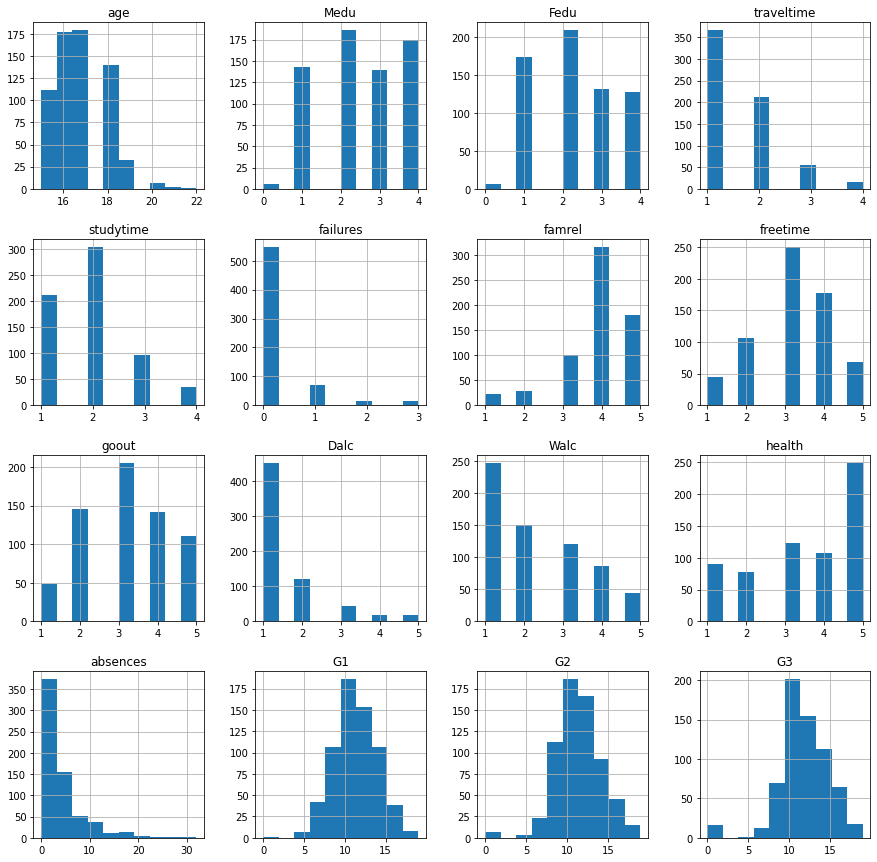

In [ ]:
data.hist(figsize=(15, 15))

# 1 модель

По данным дашбордов зависимости успеваемости от признаков выберем некоторые из них, которые оказывают максимальное влияние (создают благоприятные условия для обучения ребенка)

Колличество прогулов, время выделенное на учебу, оценки, здоровье, свободное время, наличие интернета, активности вне школы, дополнительные занятия, отношения в школе



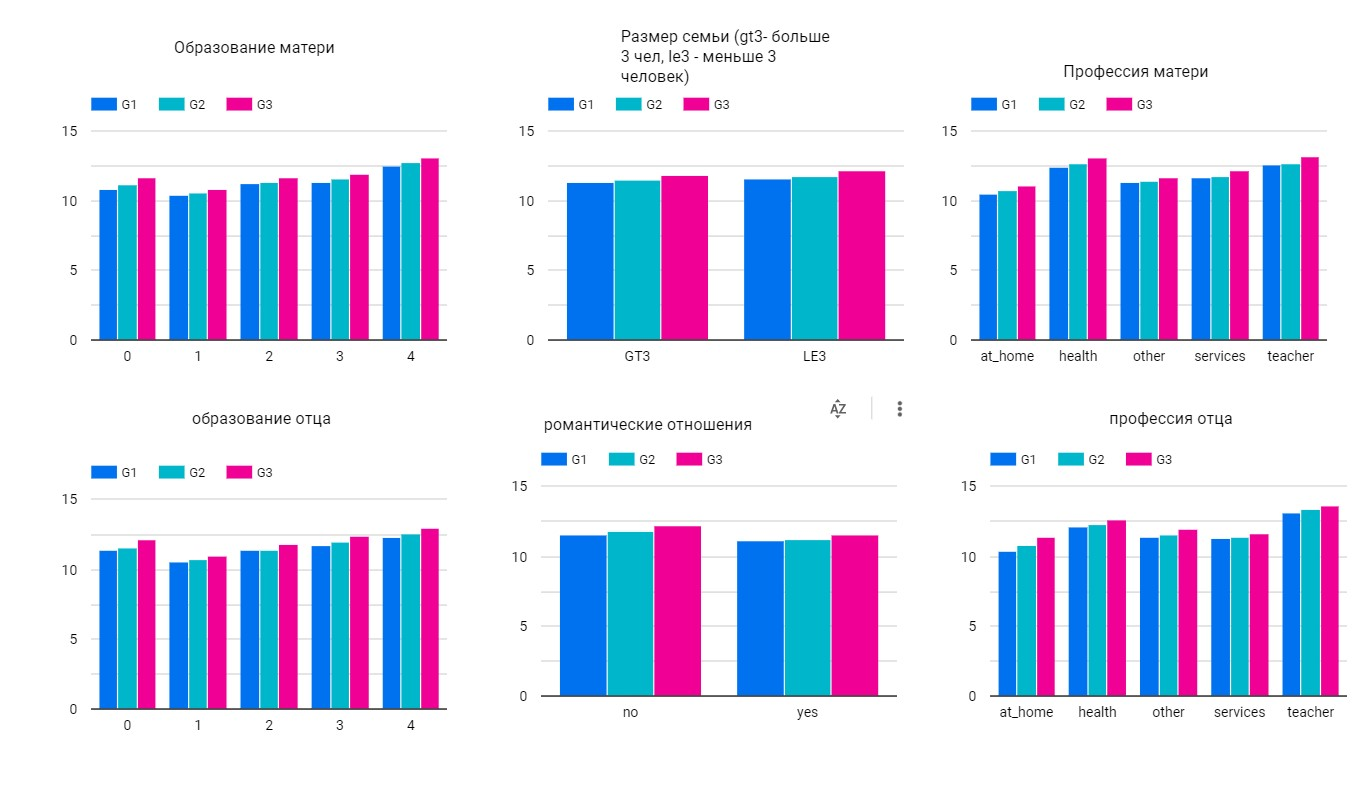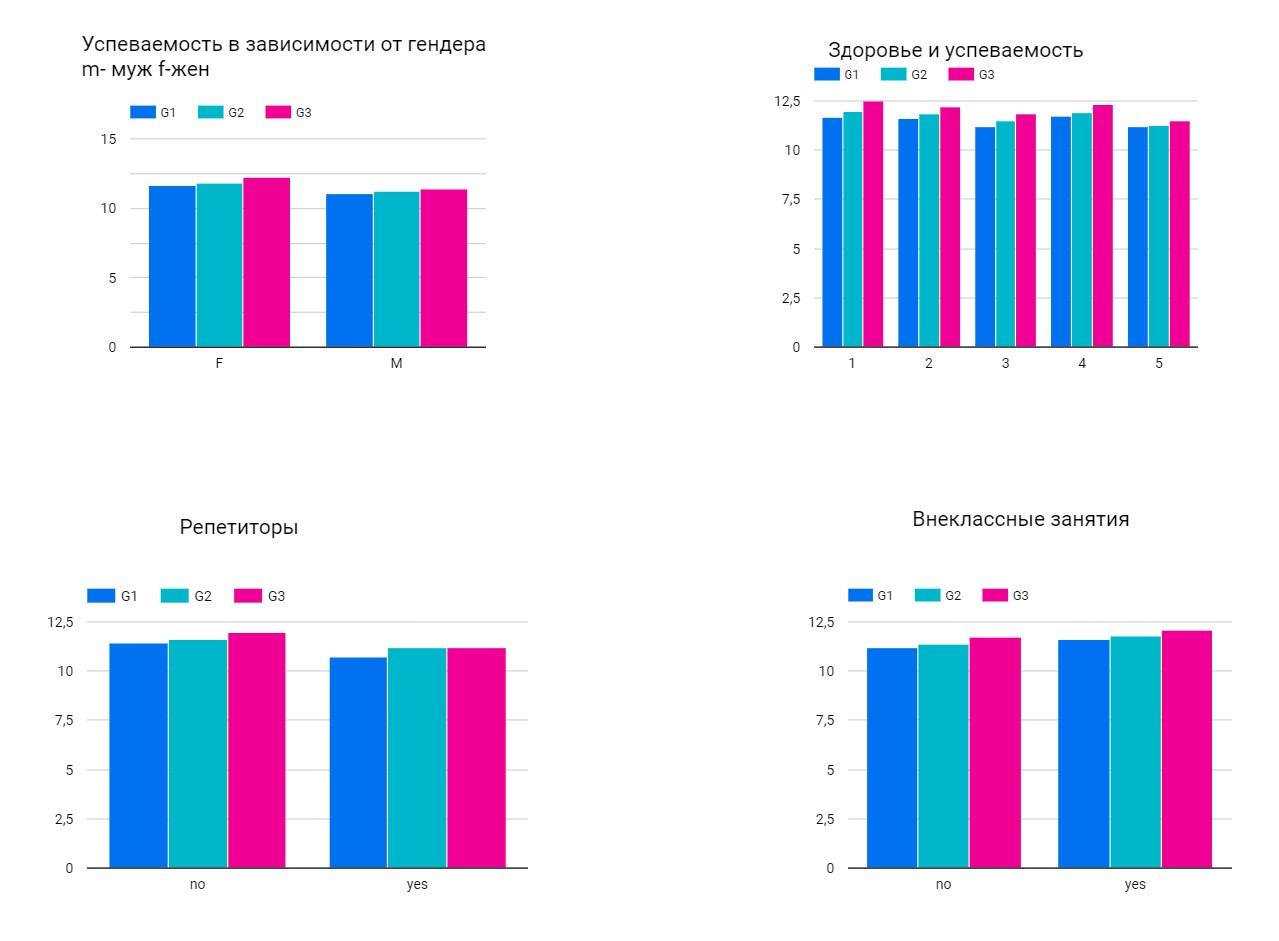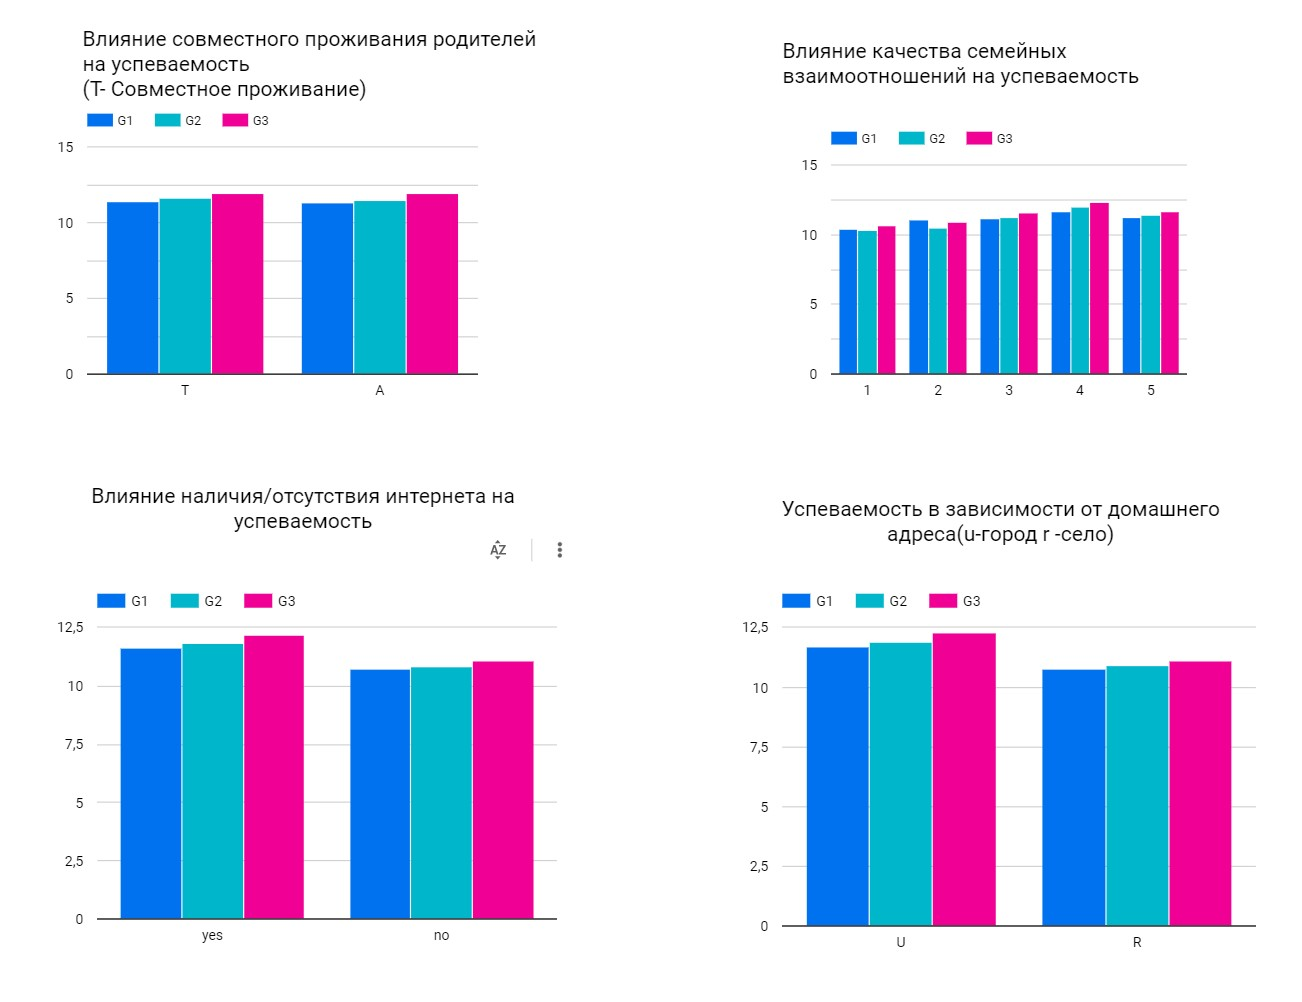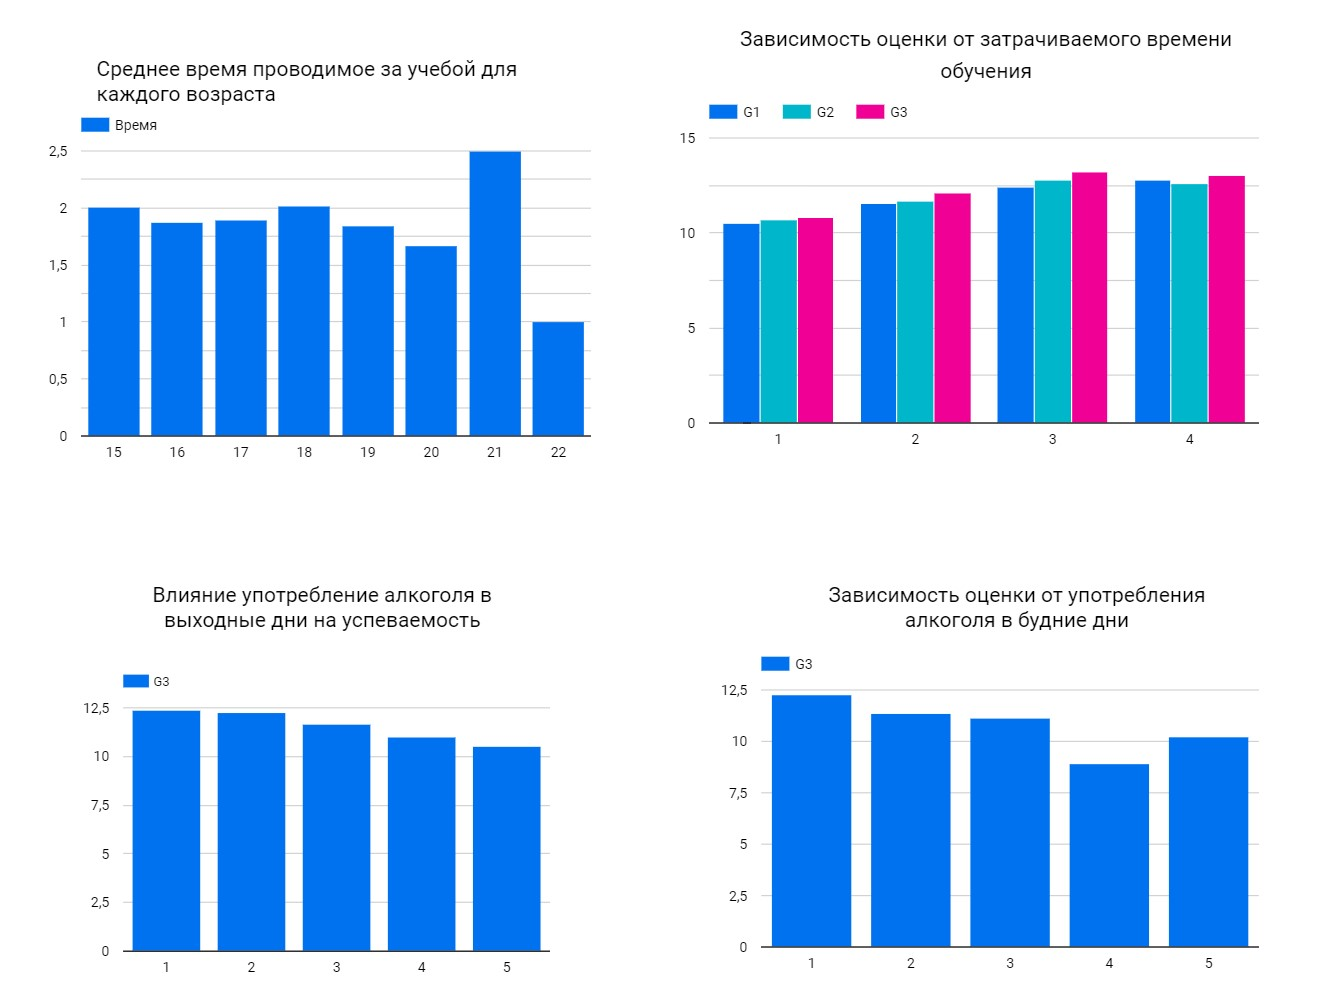

In [ ]:
data=data[['absences','failures','G1','G2','G3','studytime','school','health','freetime','internet','activities','schoolsup','famsup','paid']]
data

,absences,failures,G1,G2,G3,studytime,school,health,freetime,internet,activities,schoolsup,famsup,paid
0,4,0,0,11,11,2,GP,3,3,no,no,yes,no,no
1,2,0,9,11,11,2,GP,3,3,yes,no,no,yes,no
2,6,0,12,13,12,2,GP,3,3,yes,no,yes,no,no
3,0,0,14,14,14,3,GP,5,2,yes,yes,no,yes,no
4,0,0,11,13,13,2,GP,5,3,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,4,1,10,11,10,3,MS,5,4,yes,yes,no,no,no
645,4,0,15,15,16,2,MS,1,3,yes,no,no,yes,no
646,6,0,11,12,9,2,MS,5,1,no,yes,no,no,no
647,6,0,10,10,10,1,MS,2,4,yes,no,no,no,no


## Предобработка

Как мы видим, некоторые колонки содержат не понятные компьютеру числа, а текстовые значения, а именно:

1.  school_dict
2. internet_dict
3. activities_dict
4. schoolsup_dict 
5. famsup_dict 
6. paid_dict





Есть простой способ закодировать данные. Наши колонки принимают всего 2 значения: yes или no. Заменим каждое значение на число. Для этого создадим сопоставляющий 0/1 no/yes соответственно

In [ ]:
school_dict = {'GP':0,'MS':1}
internet_dict = {'no':0,'yes':1}
activities_dict = {'no':0,'yes':1}
schoolsup_dict = {'no':0,'yes':1}
famsup_dict = {'no':0,'yes':1}
paid_dict = {'no':0,'yes':1}


Теперь можно заменить значения в колонках на соответствующие заданные нами выше значения с помощью метода .replace:

In [ ]:
data.school = data.school.replace(to_replace=school_dict)
data.internet = data.internet.replace(to_replace=internet_dict)
data.activities = data.activities.replace(to_replace=activities_dict)
data.schoolsup = data.schoolsup.replace(to_replace=schoolsup_dict)
data.famsup = data.famsup.replace(to_replace=famsup_dict)
data.paid = data.paid.replace(to_replace=paid_dict)
data.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,absences,failures,G1,G2,G3,studytime,school,health,freetime,internet,activities,schoolsup,famsup,paid
0,4,0,0,11,11,2,0,3,3,0,0,1,0,0
1,2,0,9,11,11,2,0,3,3,1,0,0,1,0
2,6,0,12,13,12,2,0,3,3,1,0,1,0,0
3,0,0,14,14,14,3,0,5,2,1,1,0,1,0
4,0,0,11,13,13,2,0,5,3,0,0,0,1,0


## Корреляция

Посчитаем коэффициенты корреляции между колонками таблицы:

In [ ]:
data.corr().style.format("{:.2}").background_gradient(cmap='coolwarm', axis=1)

,absences,failures,G1,G2,G3,studytime,school,health,freetime,internet,activities,schoolsup,famsup,paid
absences,1.0,0.12,-0.15,-0.12,-0.091,-0.12,-0.16,-0.03,-0.019,0.067,-0.015,-0.06,0.042,-0.036
failures,0.12,1.0,-0.38,-0.39,-0.39,-0.15,0.11,0.036,0.11,-0.095,0.00056,-0.00075,-0.007,0.069
G1,-0.15,-0.38,1.0,0.86,0.83,0.26,-0.29,-0.052,-0.094,0.14,0.08,-0.072,0.038,-0.063
G2,-0.12,-0.39,0.86,1.0,0.92,0.24,-0.27,-0.082,-0.11,0.15,0.067,-0.057,0.038,-0.034
G3,-0.091,-0.39,0.83,0.92,1.0,0.25,-0.28,-0.099,-0.12,0.15,0.06,-0.066,0.059,-0.055
studytime,-0.12,-0.15,0.26,0.24,0.25,1.0,-0.14,-0.056,-0.069,0.038,0.07,0.089,0.14,-0.0023
school,-0.16,0.11,-0.29,-0.27,-0.28,-0.14,1.0,-0.059,0.035,-0.24,-0.089,-0.12,-0.064,-0.0079
health,-0.03,0.036,-0.052,-0.082,-0.099,-0.056,-0.059,1.0,0.085,-0.023,0.013,0.023,0.019,0.063
freetime,-0.019,0.11,-0.094,-0.11,-0.12,-0.069,0.035,0.085,1.0,0.063,0.15,-0.016,0.0038,-0.05
internet,0.067,-0.095,0.14,0.15,0.15,0.038,-0.24,-0.023,0.063,1.0,0.082,-0.026,0.072,0.032


По данной таблице видно, что выбранные нами признаки не зависят друг от друга

## Нормализация

In [ ]:
columnsData = data.columns

Создаём инструмент для нормализации признаков.

In [ ]:
min_max_scaler = MinMaxScaler()

Преобразуем признаки (на выходе будет np.ndarray)

In [ ]:
data = min_max_scaler.fit_transform(data)

Преобразуем np.ndarray обратно в pandas таблицу для удобства

In [ ]:
data = pd.DataFrame(data, columns=columnsData)
data.head()

,absences,failures,G1,G2,G3,studytime,school,health,freetime,internet,activities,schoolsup,famsup,paid
0,0.1250,0.0,0.000000,0.578947,0.578947,0.333333,0.0,0.5,0.50,0.0,0.0,1.0,0.0,0.0
1,0.0625,0.0,0.473684,0.578947,0.578947,0.333333,0.0,0.5,0.50,1.0,0.0,0.0,1.0,0.0
2,0.1875,0.0,0.631579,0.684211,0.631579,0.333333,0.0,0.5,0.50,1.0,0.0,1.0,0.0,0.0
3,0.0000,0.0,0.736842,0.736842,0.736842,0.666667,0.0,1.0,0.25,1.0,1.0,0.0,1.0,0.0
4,0.0000,0.0,0.578947,0.684211,0.684211,0.333333,0.0,1.0,0.50,0.0,0.0,0.0,1.0,0.0


## Построение модели

Разделим наши данные на признаки и предсказываемое значение

In [ ]:
predict='G3'
x=np.array(data.drop(['G3'],1))
y=np.array(data[predict])

Разделим данные на тестовую и обучающую выборки

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.33)

Создаем прототип модели линейной регрессии

In [ ]:
linear_regression_model = LinearRegression()
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((215, 13), (434, 13), (215,), (434,))

Обучаем нашу модель

In [ ]:
linear_regression_model.fit(x_train, y_train)
test_predictions_linear = linear_regression_model.predict(x_test)
train_predictions_linear = linear_regression_model.predict(x_train)

## Оценка модели

Посчитаем оценки для нашей модели:


1.   MAE-**mean_absolute_error**-Средняя абсолютная ошибка
2.   MSE-**mean_squared_error**-Среднеквадратичная ошибка





In [ ]:
# для тестовых данных
mae1=mean_absolute_error(y_test, test_predictions_linear)
mse1=mean_squared_error(y_test, test_predictions_linear )
r2_1=r2_score(y_test, test_predictions_linear)

# для трейни
mae1_train=mean_absolute_error(y_train, train_predictions_linear)
mse1_train=mean_squared_error(y_train, train_predictions_linear)
r2_1_train=r2_score(y_train, train_predictions_linear)
mae1,mse1,r2_1, mae1_train, mse1_train,r2_1_train

(0.04442666311726452,
 0.005644482988995696,
 0.7910336250437192,
 0.04102624629256321,
 0.0037422362041624867,
 0.874363868274551)

Посмотрим на эффективность нашей модели на графиках

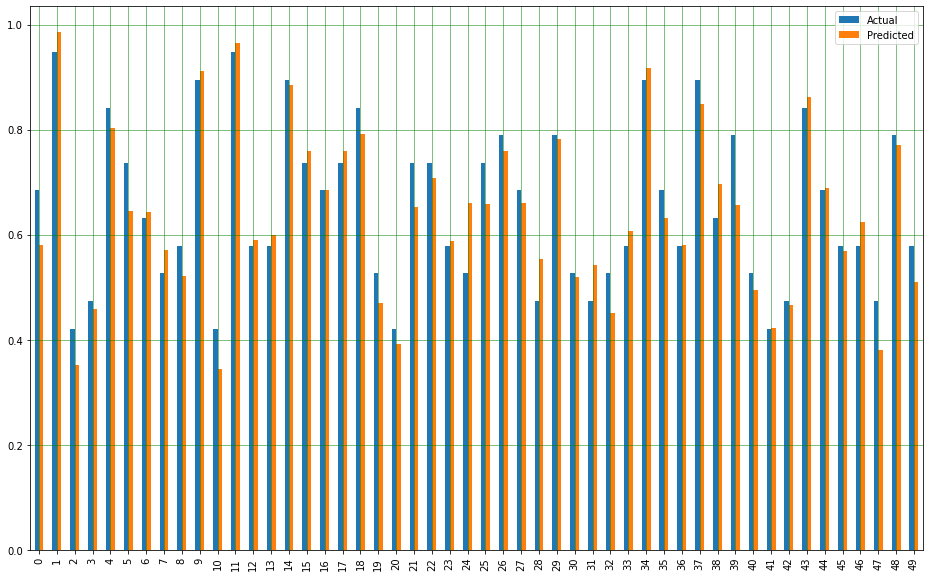

In [ ]:
df = pd.DataFrame({'Actual':y_test , 'Predicted':test_predictions_linear })
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


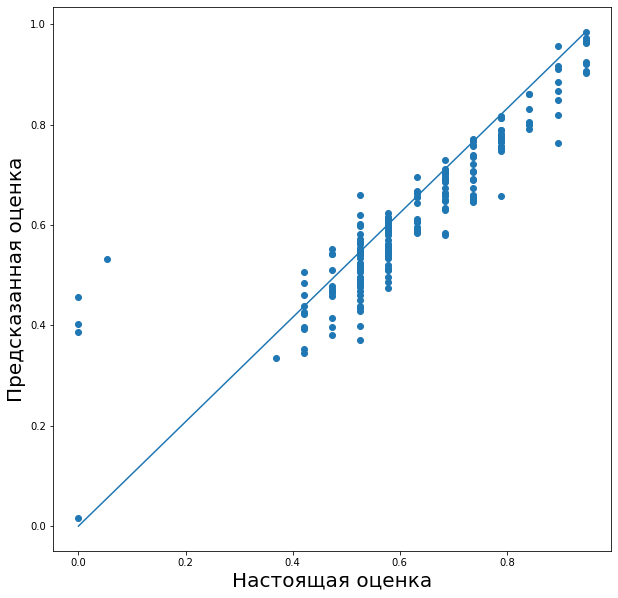

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая оценка', fontsize=20)
plt.ylabel('Предсказанная оценка', fontsize=20);

# 2 модель

Возьмем тот же набор данных, но выберем другой набор признаков, выберем факторы, которые влияют на эмоциональное состояние ребенка, его социальную жизнь)

Живут ли родители вместе, состоит ли в отношениях, отношения в семье, отношение к алкоголю.

In [ ]:
data2 = pd.read_excel('student-por.xlsx')
data2=data2[['age','G1','G2','G3','Pstatus','romantic','famrel','Walc','Dalc']]
data2

,age,G1,G2,G3,Pstatus,romantic,famrel,Walc,Dalc
0,18,0,11,11,A,no,4,1,1
1,17,9,11,11,T,no,5,1,1
2,15,12,13,12,T,no,4,3,2
3,15,14,14,14,T,yes,3,1,1
4,16,11,13,13,T,no,4,2,1
...,...,...,...,...,...,...,...,...,...
644,19,10,11,10,T,no,5,2,1
645,18,15,15,16,T,no,4,1,1
646,18,11,12,9,T,no,1,1,1
647,17,10,10,10,T,no,2,4,3


## Предобработка

Как мы видим, некоторые колонки содержат не понятные компьютеру числа, а текстовые значения, а именно:

Pstatus, romantic

Есть простой способ закодировать данные.  Заменим каждое значение на число.

  Для этого создадим словарь для признака **Pstatus**, сопоставляющий 0/1 А/Т соответственно.

  А также создадим словарь для признака **romantic**, сопоставляющий 0/1 no/yes соответственно

In [ ]:
Pstatus_dict = {'A':0,'T':1}
romantic_dict = {'no':0,'yes':1}

Теперь можно заменить значения в колонках на соответствующие заданные нами выше значения с помощью метода .replace:

In [ ]:
data2.Pstatus = data2.Pstatus.replace(to_replace=Pstatus_dict)
data2.romantic = data2.romantic.replace(to_replace=romantic_dict)

## Нормализация

In [ ]:
columnsData2 = data2.columns


Создаём инструмент для нормализации признаков.

In [ ]:
min_max_scaler = MinMaxScaler()

Преобразуем признаки (на выходе будет np.ndarray).

In [ ]:
data2 = min_max_scaler.fit_transform(data2)

Преобразуем np.ndarray обратно в pandas таблицу для удобства.

In [ ]:
data2 = pd.DataFrame(data2, columns=columnsData2)
data2.head()

,age,G1,G2,G3,Pstatus,romantic,famrel,Walc,Dalc
0,0.428571,0.000000,0.578947,0.578947,0.0,0.0,0.75,0.00,0.00
1,0.285714,0.473684,0.578947,0.578947,1.0,0.0,1.00,0.00,0.00
2,0.000000,0.631579,0.684211,0.631579,1.0,0.0,0.75,0.50,0.25
3,0.000000,0.736842,0.736842,0.736842,1.0,1.0,0.50,0.00,0.00
4,0.142857,0.578947,0.684211,0.684211,1.0,0.0,0.75,0.25,0.00


## Построение модели

Разделим данные на признаки и предсказываемое значение

In [ ]:
predict='G3'
x2=np.array(data2.drop(['G3'],1))
y2=np.array(data2[predict])

Разделим выборку на тестовую и обучающую

In [ ]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x, y, test_size=0.33)

Создаем прототип модели линейной регрессии

In [ ]:
linear_regression_model2 = LinearRegression()
x_test2.shape,x_train2.shape,y_test2.shape,y_train2.shape

((215, 13), (434, 13), (215,), (434,))

Обучаем нашу модель

In [ ]:
linear_regression_model2.fit(x_train2, y_train2)
test_predictions_linear2 = linear_regression_model2.predict(x_test2)
train_predictions_linear2 = linear_regression_model2.predict(x_train2)

## Оценка модели

Посчитаем оценки для нашей модели:

1. MAE-**mean_absolute_error**-Средняя абсолютная ошибка
2. MSE-**mean_squared_error**-Среднеквадратичная ошибка

In [ ]:
#тест
mae2=mean_absolute_error(y_test2, test_predictions_linear2)
mse2=mean_squared_error(y_test2, test_predictions_linear2 )
r2_2=r2_score(y_test2, test_predictions_linear2)

#трейни
mae2_train=mean_absolute_error(y_train2, train_predictions_linear2 )
mse2_train=mean_squared_error(y_train2, train_predictions_linear2  )
r2_2_train=r2_score(y_train2, train_predictions_linear2)
mae2, mse2,r2_2, mae2_train, mse2_train,r2_2_train


(0.04069058460616581,
 0.0041075864238776065,
 0.859552047245736,
 0.04174480578090655,
 0.004353961120821754,
 0.8481785857063048)

Посмотрим графики по нашей модели

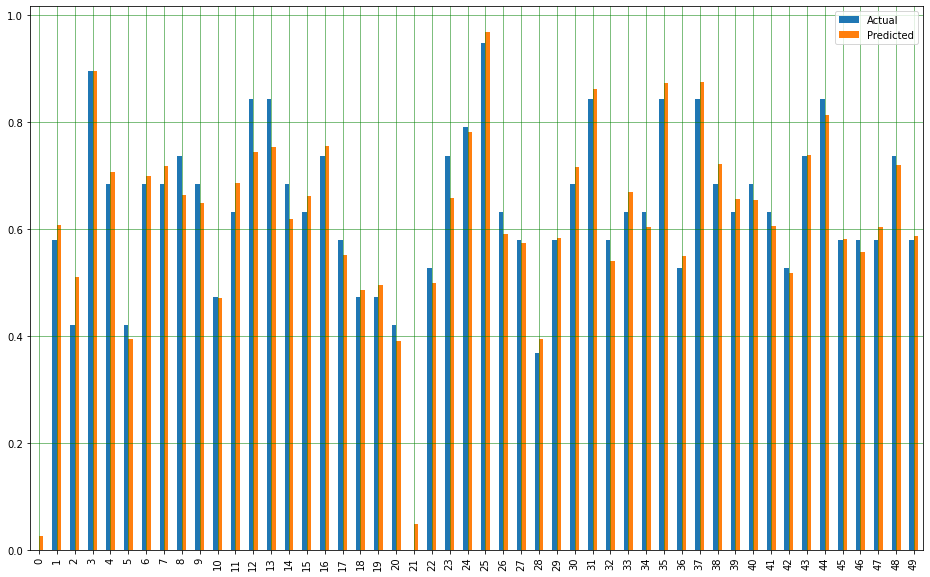

In [ ]:
df = pd.DataFrame({'Actual':y_test2 , 'Predicted':test_predictions_linear2 })
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

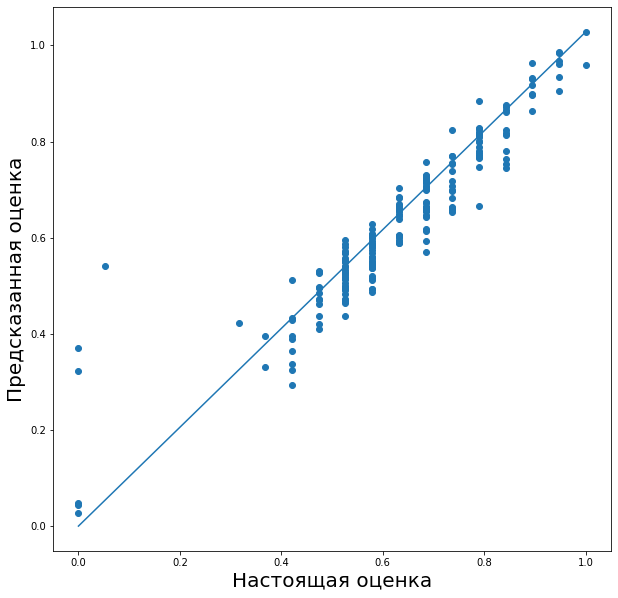

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test2, test_predictions_linear2) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test2)], [0, max(test_predictions_linear2)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая оценка', fontsize=20)
plt.ylabel('Предсказанная оценка', fontsize=20);

# 3 модель 

## Загрузка и предобработка

Попробуем посмтроить еще одну модель, по данным:

прогулы, провалы, оценки, время за учебой, здоровье, наличие интернета, активность, образование родителей, прогулки с друзьями.

In [ ]:
newData = pd.read_excel('student-por.xlsx');
newData=newData[['absences','failures','G1','G2','G3','studytime','school','health','freetime','internet','activities','schoolsup','famsup','paid', 'sex', 'Medu', 'Fedu', 'traveltime', 'higher', 'famrel', 'goout']]

# снова заменяем не числовые данные, на те, которые будут понятны 

higher_dict={'no':0, 'yes':1}
sex_dict = {'F': 0, 'M': 1}

newData.school = newData.school.replace(to_replace=school_dict)
newData.internet = newData.internet.replace(to_replace=internet_dict)
newData.activities = newData.activities.replace(to_replace=activities_dict)
newData.schoolsup = newData.schoolsup.replace(to_replace=schoolsup_dict)
newData.famsup = newData.famsup.replace(to_replace=famsup_dict)
newData.paid = newData.paid.replace(to_replace=paid_dict)
newData.sex = newData.sex.replace(to_replace=sex_dict)
newData.higher = newData.higher.replace(to_replace=higher_dict)

newData.head()

,absences,failures,G1,G2,G3,studytime,school,health,freetime,internet,activities,schoolsup,famsup,paid,sex,Medu,Fedu,traveltime,higher,famrel,goout
0,4,0,0,11,11,2,0,3,3,0,0,1,0,0,0,4,4,2,1,4,4
1,2,0,9,11,11,2,0,3,3,1,0,0,1,0,0,1,1,1,1,5,3
2,6,0,12,13,12,2,0,3,3,1,0,1,0,0,0,1,1,1,1,4,2
3,0,0,14,14,14,3,0,5,2,1,1,0,1,0,0,4,2,1,1,3,2
4,0,0,11,13,13,2,0,5,3,0,0,0,1,0,0,3,3,1,1,4,2


In [ ]:
data.corr().style.format("{:.2}").background_gradient(cmap='coolwarm', axis=1)

,absences,failures,G1,G2,G3,studytime,school,health,freetime,internet,activities,schoolsup,famsup,paid
absences,1.0,0.12,-0.15,-0.12,-0.091,-0.12,-0.16,-0.03,-0.019,0.067,-0.015,-0.06,0.042,-0.036
failures,0.12,1.0,-0.38,-0.39,-0.39,-0.15,0.11,0.036,0.11,-0.095,0.00056,-0.00075,-0.007,0.069
G1,-0.15,-0.38,1.0,0.86,0.83,0.26,-0.29,-0.052,-0.094,0.14,0.08,-0.072,0.038,-0.063
G2,-0.12,-0.39,0.86,1.0,0.92,0.24,-0.27,-0.082,-0.11,0.15,0.067,-0.057,0.038,-0.034
G3,-0.091,-0.39,0.83,0.92,1.0,0.25,-0.28,-0.099,-0.12,0.15,0.06,-0.066,0.059,-0.055
studytime,-0.12,-0.15,0.26,0.24,0.25,1.0,-0.14,-0.056,-0.069,0.038,0.07,0.089,0.14,-0.0023
school,-0.16,0.11,-0.29,-0.27,-0.28,-0.14,1.0,-0.059,0.035,-0.24,-0.089,-0.12,-0.064,-0.0079
health,-0.03,0.036,-0.052,-0.082,-0.099,-0.056,-0.059,1.0,0.085,-0.023,0.013,0.023,0.019,0.063
freetime,-0.019,0.11,-0.094,-0.11,-0.12,-0.069,0.035,0.085,1.0,0.063,0.15,-0.016,0.0038,-0.05
internet,0.067,-0.095,0.14,0.15,0.15,0.038,-0.24,-0.023,0.063,1.0,0.082,-0.026,0.072,0.032


Посмотрим на корреляцию данных, и как мы видим, они не сильно влияют друг на друга.

## Нормализация

Также как и в предыдущих случаях проведем нормализацию признаков.
1. Выбираем наши столбцы для нормализации
2. Создаем инструмент для нормализации
3. Преобразуем признаки, на выходе получим np.ndarray
4. Преобразуем обратно в pandas таблицу для удобства


In [ ]:
columnsNewData = newData.columns
min_max_scaler = MinMaxScaler()
newData = min_max_scaler.fit_transform(newData)
newData = pd.DataFrame(newData, columns=columnsNewData)
newData.head()

,absences,failures,G1,G2,G3,studytime,school,health,freetime,internet,activities,schoolsup,famsup,paid,sex,Medu,Fedu,traveltime,higher,famrel,goout
0,0.1250,0.0,0.000000,0.578947,0.578947,0.333333,0.0,0.5,0.50,0.0,0.0,1.0,0.0,0.0,0.0,1.00,1.00,0.333333,1.0,0.75,0.75
1,0.0625,0.0,0.473684,0.578947,0.578947,0.333333,0.0,0.5,0.50,1.0,0.0,0.0,1.0,0.0,0.0,0.25,0.25,0.000000,1.0,1.00,0.50
2,0.1875,0.0,0.631579,0.684211,0.631579,0.333333,0.0,0.5,0.50,1.0,0.0,1.0,0.0,0.0,0.0,0.25,0.25,0.000000,1.0,0.75,0.25
3,0.0000,0.0,0.736842,0.736842,0.736842,0.666667,0.0,1.0,0.25,1.0,1.0,0.0,1.0,0.0,0.0,1.00,0.50,0.000000,1.0,0.50,0.25
4,0.0000,0.0,0.578947,0.684211,0.684211,0.333333,0.0,1.0,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.75,0.000000,1.0,0.75,0.25


## Построение модели

Делим выборку на test и train

In [ ]:
train_newData, test_newData, train_labels, test_labels = train_test_split (newData, newData['G3'], test_size = 0.25, random_state = 42)

In [ ]:
print ('Форма обучающих элементов:', train_newData.shape) 
print ('Форма обучающих этикеток:', test_newData.shape) 
print ('Форма тестовых функций:', train_labels.shape) 
print ('Тестирование формы ярлыков:', test_labels.shape)

Форма обучающих элементов: (486, 21)
Форма обучающих этикеток: (163, 21)
Форма тестовых функций: (486,)
Тестирование формы ярлыков: (163,)


Создаем экземпляр модели с 1000 деревьями решений

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


Обучаем нашу модель

In [ ]:
rf.fit(train_newData, train_labels);
predictions = rf.predict(test_newData)
predictions_train = rf.predict(train_newData)

## Оценка

Посчитаем оценки для нашей модели:

MAE-mean_absolute_error-Средняя абсолютная ошибка


MSE-mean_squared_error-Среднеквадратичная ошибка

In [ ]:
mae3=mean_absolute_error(test_labels, predictions)
mse3=mean_squared_error(test_labels, predictions)
r2_3=r2_score(test_labels, predictions)
mae3_train=mean_absolute_error(train_labels, predictions_train)
mse3_train=mean_squared_error(train_labels, predictions_train)
r2_3_train=r2_score(train_labels, predictions_train)
mae3,mse3,r2_3, mae3_train, mse3_train,r2_3_train

(0.0008776235066263066,
 2.2282888363951298e-05,
 0.9992020210579766,
 0.00026976391596954523,
 3.659752858429259e-06,
 0.9998740219744285)

Построим график

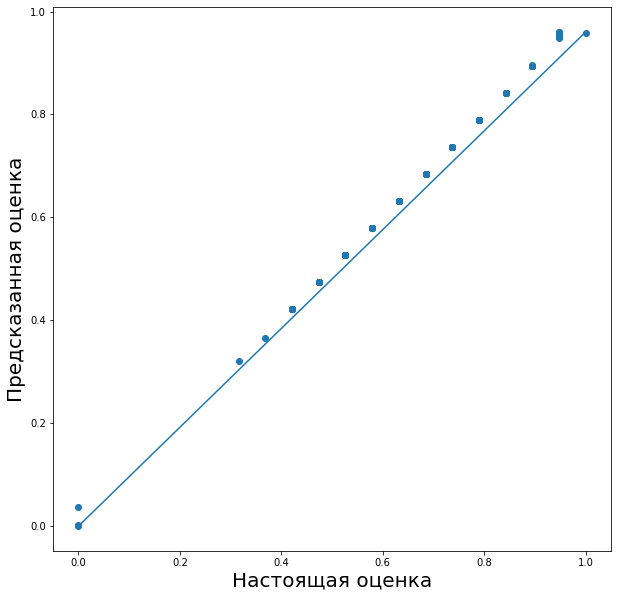

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_labels)], [0, max(predictions)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая оценка', fontsize=20)
plt.ylabel('Предсказанная оценка', fontsize=20);

# Модель по всем признакам

In [ ]:
data = pd.read_excel('student-por.xlsx')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


## Предобработка

In [ ]:
school_dict = {'GP':0,'MS':1}
internet_dict = {'no':0,'yes':1}
activities_dict = {'no':0,'yes':1}
schoolsup_dict = {'no':0,'yes':1}
nursery_dict={'no':0,'yes':1}
higher_dict={'no':0,'yes':1}
internet_dict={'no':0,'yes':1}
romantic_dict={'no':0,'yes':1}
famsup_dict = {'no':0,'yes':1}
paid_dict = {'no':0,'yes':1}
famsize_dict={'GT3':1, 'LE3':0}
sex_dict={'M':0,'F':1}
address_dict={'U':0,'R':1}
Pstatus_dict={'A':0, 'T':1}
guardian_dict={'mother':0,'father':1,'other':2 }


In [ ]:
data = pd.get_dummies(data, columns=['Mjob'])
data = pd.get_dummies(data, columns=['Fjob'])
data = pd.get_dummies(data, columns=['reason'])

Теперь можно заменить значения в колонках на соответствующие заданные нами выше значения с помощью метода .replace:

In [ ]:
data.school =data.school.replace(to_replace=school_dict)
data.internet =data.internet.replace(to_replace=internet_dict)
data.activities =data.activities.replace(to_replace=activities_dict)
data.schoolsup =data.schoolsup.replace(to_replace=schoolsup_dict)
data.nursery=data.nursery.replace(to_replace=nursery_dict)
data.higher=data.higher.replace(to_replace=higher_dict)
data.romantic=data.romantic.replace(to_replace=romantic_dict)
data.famsup = data.famsup.replace(to_replace=famsup_dict)
data.paid =data.paid.replace(to_replace=paid_dict)
data.famsize=data.famsize.replace(to_replace=famsize_dict)
data.sex=data.sex.replace(to_replace=sex_dict)
data.address=data.address.replace(to_replace=address_dict)
data.Pstatus=data.Pstatus.replace(to_replace=Pstatus_dict)
data.guardian=data.guardian.replace(to_replace=guardian_dict)
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,0,1,18,0,1,0,4,4,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,1,17,0,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,1,15,0,0,1,1,1,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1,15,0,1,1,4,2,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1,16,0,1,1,3,3,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,0,1,18,0,1,0,4,4,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,1,17,0,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,1,15,0,0,1,1,1,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1,15,0,1,1,4,2,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1,16,0,1,1,3,3,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,1,2,3,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0
645,1,1,18,0,0,1,3,1,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16,0,0,0,0,1,0,0,0,1,0,1,0,0,0
646,1,1,18,0,1,1,1,1,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9,0,0,1,0,0,0,0,1,0,0,1,0,0,0
647,1,0,17,0,0,1,3,1,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10,0,0,0,1,0,0,0,0,1,0,1,0,0,0


## Нормализация

In [ ]:
columnsData = data.columns

Создаём инструмент для нормализации признаков.

In [ ]:
min_max_scaler = MinMaxScaler()

Преобразуем признаки (на выходе будет np.ndarray)

In [ ]:
data = min_max_scaler.fit_transform(data)

Преобразуем np.ndarray обратно в pandas таблицу для удобства

In [ ]:
data = pd.DataFrame(data, columns=columnsData)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,0.0,1.0,0.428571,0.0,1.0,0.0,1.00,1.00,0.0,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.1250,0.000000,0.578947,0.578947,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.285714,0.0,1.0,1.0,0.25,0.25,0.5,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.0625,0.473684,0.578947,0.578947,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.000000,0.0,0.0,1.0,0.25,0.25,0.0,0.000000,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.1875,0.631579,0.684211,0.631579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.000000,0.0,1.0,1.0,1.00,0.50,0.0,0.000000,0.666667,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.0000,0.736842,0.736842,0.736842,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.142857,0.0,1.0,1.0,0.75,0.75,0.5,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.0000,0.578947,0.684211,0.684211,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Построение модели

Разделим наши данные на признаки и предсказываемое значение

In [ ]:
predict='G3'
x=np.array(data.drop(['G3'],1))
y=np.array(data[predict])

Разделим данные на тестовую и обучающую выборки

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.33)

Создаем прототип модели линейной регрессии

In [ ]:
linear_regression_model = LinearRegression()
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((215, 43), (434, 43), (215,), (434,))

Обучаем нашу модель

In [ ]:
linear_regression_model.fit(x_train, y_train)
test_predictions_linear = linear_regression_model.predict(x_test)
train_predictions_linear = linear_regression_model.predict(x_train)

## Оценка модели

Посчитаем оценки для нашей модели:


1.   MAE-**mean_absolute_error**-Средняя абсолютная ошибка
2.   MSE-**mean_squared_error**-Среднеквадратичная ошибка





In [ ]:
maeAll=mean_absolute_error(y_test, test_predictions_linear)
mseAll=mean_squared_error(y_test, test_predictions_linear )
r2_All=r2_score(y_test, test_predictions_linear)
maeAll_train=mean_absolute_error(y_train, train_predictions_linear)
mseAll_train=mean_squared_error(y_train, train_predictions_linear)
r2_All_train=r2_score(y_train, train_predictions_linear)
maeAll,mseAll, maeAll_train, mseAll_train,r2_All,r2_All_train


(0.0443548232864137,
 0.0037544831429100413,
 0.041810044263885515,
 0.004486944783276725,
 0.8660093053559424,
 0.8464870952896564)

Оценки модели получились немного лучше, но оценки на трейни и тестах сильно отличаются, что свидетельствует о том, что модель не достаточно хорошая.

Посмотрим на эффективность нашей модели на графиках

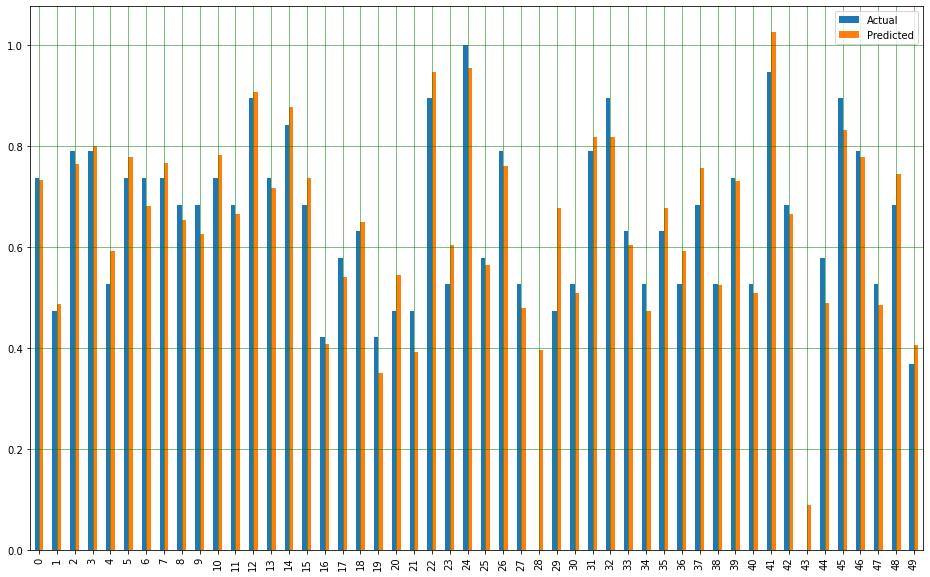

In [ ]:
df = pd.DataFrame({'Actual':y_test , 'Predicted':test_predictions_linear })
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


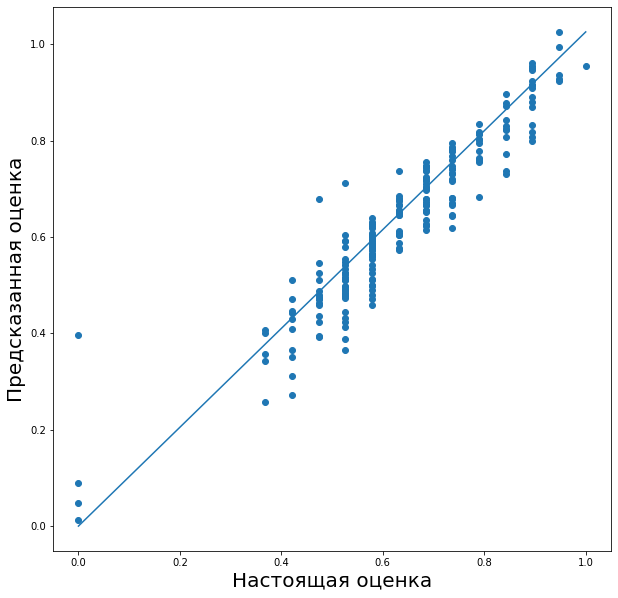

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая оценка', fontsize=20)
plt.ylabel('Предсказанная оценка', fontsize=20);

# Random Forest regressor без нормализации

## Загрузка и предобработка

In [ ]:
newData = pd.read_excel('student-por.xlsx');
newData=newData[['absences','failures','G1','G2','G3','studytime','school','health','freetime','internet','activities','schoolsup','famsup','paid', 'sex', 'Medu', 'Fedu', 'traveltime', 'higher', 'famrel', 'goout']]

higher_dict={'no':0, 'yes':1}
sex_dict = {'F': 0, 'M': 1}

newData.school = newData.school.replace(to_replace=school_dict)
newData.internet = newData.internet.replace(to_replace=internet_dict)
newData.activities = newData.activities.replace(to_replace=activities_dict)
newData.schoolsup = newData.schoolsup.replace(to_replace=schoolsup_dict)
newData.famsup = newData.famsup.replace(to_replace=famsup_dict)
newData.paid = newData.paid.replace(to_replace=paid_dict)
newData.sex = newData.sex.replace(to_replace=sex_dict)
newData.higher = newData.higher.replace(to_replace=higher_dict)

newData.head()

,absences,failures,G1,G2,G3,studytime,school,health,freetime,internet,activities,schoolsup,famsup,paid,sex,Medu,Fedu,traveltime,higher,famrel,goout
0,4,0,0,11,11,2,0,3,3,0,0,1,0,0,0,4,4,2,1,4,4
1,2,0,9,11,11,2,0,3,3,1,0,0,1,0,0,1,1,1,1,5,3
2,6,0,12,13,12,2,0,3,3,1,0,1,0,0,0,1,1,1,1,4,2
3,0,0,14,14,14,3,0,5,2,1,1,0,1,0,0,4,2,1,1,3,2
4,0,0,11,13,13,2,0,5,3,0,0,0,1,0,0,3,3,1,1,4,2


In [ ]:
data.corr().style.format("{:.2}").background_gradient(cmap='coolwarm', axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
school,1.0,0.083,0.087,0.35,-0.022,0.028,-0.25,-0.21,0.033,0.25,-0.14,0.11,-0.12,-0.064,-0.0079,-0.089,0.0047,-0.14,-0.24,0.072,-0.032,0.035,0.045,0.047,0.014,-0.059,-0.16,-0.29,-0.27,-0.28,0.2,-0.071,0.041,-0.12,-0.1,0.14,-0.053,-0.064,0.065,-0.092,0.12,-0.14,0.21,-0.16
sex,0.083,1.0,0.044,0.026,0.098,-0.065,-0.12,-0.084,-0.019,-0.041,0.21,-0.074,0.11,0.13,-0.079,-0.12,0.044,0.058,-0.066,0.11,-0.083,-0.15,-0.058,-0.28,-0.32,-0.14,-0.021,0.1,0.1,0.13,0.13,-0.04,0.024,-0.056,-0.1,0.054,0.0072,0.034,-0.048,-0.044,0.049,-0.059,-0.035,0.027
age,0.087,0.044,1.0,0.026,0.0025,-0.0056,-0.11,-0.12,0.17,0.034,-0.0084,0.32,-0.17,-0.1,-0.0055,-0.054,-0.021,-0.27,0.013,0.18,-0.021,-0.0049,0.11,0.13,0.086,-0.0088,0.15,-0.17,-0.11,-0.11,0.089,-0.1,0.039,-0.035,-0.047,0.055,-0.1,0.058,-0.025,-0.054,0.03,-0.015,-0.0064,-0.017
address,0.35,0.026,0.026,1.0,0.046,0.095,-0.19,-0.14,0.026,0.34,-0.062,0.064,-0.018,-0.0056,0.03,0.0093,-0.018,-0.077,-0.18,0.031,0.034,0.037,-0.015,0.047,0.012,-0.0038,-0.074,-0.16,-0.15,-0.17,0.17,-0.084,0.039,-0.1,-0.073,-0.024,-0.072,0.065,-0.015,-0.028,0.071,-0.16,0.087,0.013
famsize,-0.022,0.098,0.0025,0.046,1.0,0.24,0.014,0.04,0.02,-0.013,0.011,0.066,0.056,0.04,0.05,0.015,-0.1,-0.0045,-0.013,0.033,-0.0046,0.021,0.0043,-0.06,-0.082,-0.0024,-0.0046,-0.047,-0.039,-0.045,-0.0088,-0.01,0.057,-0.023,-0.04,-0.022,-0.022,-0.017,-0.0034,0.083,0.029,-0.023,0.046,-0.046
Pstatus,0.028,-0.065,-0.0056,0.095,0.24,1.0,-0.057,-0.032,0.0076,0.041,-0.0087,-0.0099,-0.0095,0.01,0.016,0.1,-0.033,0.023,0.06,-0.054,0.051,0.038,0.031,0.042,0.071,0.013,-0.12,0.015,0.019,-0.00075,0.042,0.016,-0.031,-0.037,0.028,-0.016,-0.0042,-0.073,0.097,-0.012,0.039,-0.04,0.043,-0.038
Medu,-0.25,-0.12,-0.11,-0.19,0.014,-0.057,1.0,0.65,-0.11,-0.27,0.097,-0.17,-0.022,0.12,0.11,0.12,0.13,0.21,0.27,-0.031,0.024,-0.02,0.0095,-0.007,-0.02,0.0046,-0.0086,0.26,0.26,0.24,-0.38,0.26,-0.22,0.13,0.45,-0.097,0.16,-0.12,-0.013,0.26,-0.12,0.037,-0.035,0.13
Fedu,-0.21,-0.084,-0.12,-0.14,0.04,-0.032,0.65,1.0,0.0069,-0.21,0.05,-0.17,0.024,0.14,0.095,0.08,0.075,0.19,0.18,-0.068,0.02,0.0068,0.028,6.1e-05,0.038,0.045,0.03,0.22,0.23,0.21,-0.2,0.14,-0.2,0.1,0.31,-0.11,0.23,-0.22,0.027,0.35,-0.069,0.018,-0.027,0.085
guardian,0.033,-0.019,0.17,0.026,0.02,0.0076,-0.11,0.0069,1.0,0.087,0.016,0.14,0.0032,0.047,-0.012,-0.042,-0.095,-0.14,0.029,0.067,-0.037,-0.0034,-0.025,0.12,0.0042,-0.0036,0.059,-0.047,-0.044,-0.029,0.026,0.0061,0.12,-0.084,-0.12,0.04,0.0094,-0.031,0.02,-0.023,0.02,0.0064,-0.042,0.0014
traveltime,0.25,-0.041,0.034,0.34,-0.013,0.041,-0.27,-0.21,0.087,1.0,-0.063,0.098,-0.045,-0.039,-0.045,-0.033,-0.012,-0.072,-0.19,0.0048,-0.0095,0.00094,0.057,0.093,0.057,-0.048,-0.0081,-0.15,-0.15,-0.13,0.17,-0.1,0.035,-0.072,-0.098,-0.041,-0.09,0.1,-0.032,-0.04,0.13,-0.13,0.059,-0.076


## Построение модели

Делим выборку на test и train

In [ ]:
train_newData, test_newData, train_labels, test_labels = train_test_split (newData, newData['G3'], test_size = 0.25, random_state = 42)

In [ ]:
print ('Форма обучающих элементов:', train_newData.shape) 
print ('Форма обучающих этикеток:', test_newData.shape) 
print ('Форма тестовых функций:', train_labels.shape) 
print ('Тестирование формы ярлыков:', test_labels.shape)

Форма обучающих элементов: (486, 21)
Форма обучающих этикеток: (163, 21)
Форма тестовых функций: (486,)
Тестирование формы ярлыков: (163,)


Создаем экземпляр модели с 1000 деревьями решений

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


Обучаем нашу модель

In [ ]:
rf.fit(train_newData, train_labels);
predictions = rf.predict(test_newData)
predictions_train = rf.predict(train_newData)

## Оценка

Посчитаем оценки для нашей модели:

MAE-mean_absolute_error-Средняя абсолютная ошибка


MSE-mean_squared_error-Среднеквадратичная ошибка

In [ ]:
maeRFR=mean_absolute_error(test_labels, predictions)
mseRFR=mean_squared_error(test_labels, predictions)
r2_RFR=r2_score(test_labels, predictions)
maeRFR_train=mean_absolute_error(train_labels, predictions_train)
mseRFR_train=mean_squared_error(train_labels, predictions_train)
r2_RFR_train=r2_score(train_labels, predictions_train)
maeRFR,mseRFR, maeRFR_train, mseRFR_train, r2_RFR, r2_RFR_train

(0.014582822085889569,
 0.006362337423312887,
 0.0051090534979423945,
 0.001317261316872427,
 0.9993688545692823,
 0.9998743947549131)

Построим график

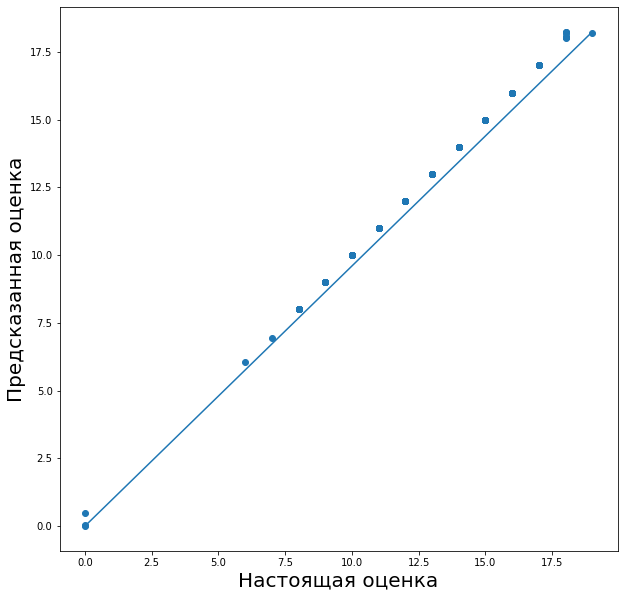

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_labels)], [0, max(predictions)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая оценка', fontsize=20)
plt.ylabel('Предсказанная оценка', fontsize=20);

Можем сделать вывод, что без нормализации данных оценка модели получилось хуже => и сама модель тоже

# Задача классификации


## Загрузка и обработка данных


In [ ]:
class_data = pd.read_excel('student-por.xlsx')
class_data.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        4   0  11  11
1       GP   F   17       U     GT3       T  ...     1       3        2   9  11  11
2       GP   F   15       U     LE3       T  ...     3       3        6  12  13  12
3       GP   F   15       U     GT3       T  ...     1       5        0  14  14  14
4       GP   F   16       U     GT3       T  ...     2       5        0  11  13  13
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
644     MS   F   19       R     GT3       T  ...     2       5        4  10  11  10
645     MS   F   18       U     LE3       T  ...     1       1        4  15  15  16
646     MS   F   18       U     GT3       T  ...     1       5        6  11  12   9
647     MS   M   17       U     LE3       T  ...     4       2        6  10  10  10
648     MS   M   18       R     LE3       T  .

In [ ]:
class_data = class_data[['absences','failures','G1','G2','G3','studytime','school','health','freetime','internet','activities','schoolsup','famsup','paid', 'sex', 'Medu', 'Fedu', 'traveltime', 'higher', 'famrel', 'goout']]

# снова заменяем не числовые данные, на те, которые будут понятны 

higher_dict={'no':0, 'yes':1}
sex_dict = {'F': 0, 'M': 1}

class_data.school = class_data.school.replace(to_replace=school_dict)
class_data.internet = class_data.internet.replace(to_replace=internet_dict)
class_data.activities = class_data.activities.replace(to_replace=activities_dict)
class_data.schoolsup = class_data.schoolsup.replace(to_replace=schoolsup_dict)
class_data.famsup = class_data.famsup.replace(to_replace=famsup_dict)
class_data.paid = class_data.paid.replace(to_replace=paid_dict)
class_data.sex = class_data.sex.replace(to_replace=sex_dict)
class_data.higher = class_data.higher.replace(to_replace=higher_dict)

class_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,absences,failures,G1,G2,G3,studytime,school,health,freetime,internet,activities,schoolsup,famsup,paid,sex,Medu,Fedu,traveltime,higher,famrel,goout
0,4,0,0,11,11,2,0,3,3,0,0,1,0,0,0,4,4,2,1,4,4
1,2,0,9,11,11,2,0,3,3,1,0,0,1,0,0,1,1,1,1,5,3
2,6,0,12,13,12,2,0,3,3,1,0,1,0,0,0,1,1,1,1,4,2
3,0,0,14,14,14,3,0,5,2,1,1,0,1,0,0,4,2,1,1,3,2
4,0,0,11,13,13,2,0,5,3,0,0,0,1,0,0,3,3,1,1,4,2


Классифицируем наши оценки на несколько подгрупп:

1) 0 - 5 = плохо 

2) 6 - 10 = нормально 

3) 11 - 15 = хорошо

4) 16 - 20 = отлично

In [ ]:
print(class_data['G3'].head())
class_data.loc[class_data['G3'] < 6,'G3'] = 0
class_data.loc[class_data['G3'] > 15,'G3'] = 3
class_data.loc[class_data['G3'] > 10,'G3'] = 2
class_data.loc[class_data['G3'] > 5,'G3'] = 1

class_data['G3'].head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib

0    2
1    2
2    2
3    2
4    2
Name: G3, dtype: int64

Посмотрим сколько значений относится к каждой группе:

In [ ]:
class_data['G3'].value_counts()

2    370
1    180
3     82
0     17
Name: G3, dtype: int64

## Построение модели

Логистическая регрессия - "адаптация" линейной регрессии для решения задачи классификации. Она принадлежит к классу обобщенных линейных моделей. А вот с помощью леса решающих деревьев можно хорошо решать и задачу регрессии, и задачу классификации.

Модель логистической регрессии сложнее, чем модель линейной регрессии. Поэтому параметров у такой модели гораздо больше. Многие из них связаны с тем, с помощью какой процедуры мы будем подбирать параметры модели (max_iter, dual, solver, tol, warm_start), устойчивостью модели (C, penalty), тем, что мы решаем задачу классификации, а не регрессии (class_weight, multi_class)

In [ ]:
from sklearn import linear_model, ensemble

# создаем модель
logistic_regression_model = linear_model.LogisticRegression()
logistic_regression_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# разделим данные
train_class, test_class, train_points, test_points = train_test_split(class_data, class_data['G3'], test_size = 0.25, random_state = 42)



In [ ]:
# обучение модели 
logistic_regression_model.fit(train_class, train_points)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# получим предсказанные данные
test_predictions_logistic_regression = logistic_regression_model.predict(test_class)

Оценим на сколько хорошо работает полученная модель:

1. Сравним колличество оценок в каждой группе, предсказанных моделью, с настоящими:

In [ ]:
print('исходные данные')
print(pd.value_counts(test_points))
print('предсказанные данные')
pd.value_counts(test_predictions_logistic_regression)

исходные данные
2    95
1    38
3    27
0     3
Name: G3, dtype: int64
предсказанные данные


2    95
1    39
3    26
0     3
dtype: int64

2. Посчитаем точность оценки, и как мы видим, с большо вероятностью можель предсказывает правильные значения!

In [ ]:
print(accuracy_score(test_points, test_predictions_logistic_regression))

0.9815950920245399


3. Для того, чтобы точно убедиться в правильноси работы моедли, и посмотреть где и сколько она ошиблась, можно построить таблицу сопряженности модели классификации. Таблица сопряжённости (матрица неточности, или Confusion matrix) содержит сводные показатели качества работы классификатора. Строки этой таблицы соответствуют фактическим классам тестового набора, а столбцы - предсказанным классификатором меткам.

In [ ]:
logistic_regression_confusion_matrix = confusion_matrix(test_points, test_predictions_logistic_regression)
logistic_regression_confusion_matrix = pd.DataFrame(logistic_regression_confusion_matrix)

logistic_regression_confusion_matrix

,0,1,2,3
0,2,1,0,0
1,0,38,0,0
2,1,0,94,0
3,0,0,1,26


Как мы видим, модель ошиблась лишь два раза => делаем вывод, что она так же достаточно хорошая.

# Результаты по первой выборке



In [ ]:
data = {'Модель': ['Модель 1', 'Модель 2', 'Модель 3','Модель по всем признакам','RFR без нормализации'], 'Mae':[mae1, mae2, mae3,maeAll,maeRFR], 'Mae_train':[mae1_train, mae2_train, mae3_train, maeAll_train, maeRFR_train],'MSE':[mse1,mse2, mse3, mseAll,mseRFR],'MSE_train':[mse1_train,mse2_train, mse3_train,mseAll_train,mseRFR_train], 'R^2':[r2_1,r2_2,r2_3,r2_All,r2_RFR], 'R^2_train':[r2_1_train,r2_2_train,r2_3_train,r2_All_train,r2_RFR_train]}
df = pd.DataFrame(data)
print(df)

                     Модель       Mae  ...       R^2  R^2_train
0                  Модель 1  0.044427  ...  0.791034   0.874364
1                  Модель 2  0.040691  ...  0.859552   0.848179
2                  Модель 3  0.000878  ...  0.999202   0.999874
3  Модель по всем признакам  0.044355  ...  0.866009   0.846487
4      RFR без нормализации  0.014583  ...  0.999369   0.999874

[5 rows x 7 columns]


In [ ]:
print([mae1, mae2, mae3,maeAll,maeRFR])
print([mae1_train, mae2_train, mae3_train, maeAll_train, maeRFR_train])
print([mse1,mse2, mse3, mseAll,mseRFR])
print([mse1_train,mse2_train, mse3_train,mseAll_train,mseRFR_train])
print([r2_1,r2_2,r2_3,r2_All,r2_RFR])
print([r2_1_train,r2_2_train,r2_3_train,r2_All_train,r2_RFR_train])


[0.04442666311726452, 0.04069058460616581, 0.0008776235066263066, 0.0443548232864137, 0.014582822085889569]
[0.04102624629256321, 0.04174480578090655, 0.00026976391596954523, 0.041810044263885515, 0.0051090534979423945]
[0.005644482988995696, 0.0041075864238776065, 2.2282888363951298e-05, 0.0037544831429100413, 0.006362337423312887]
[0.0037422362041624867, 0.004353961120821754, 3.659752858429259e-06, 0.004486944783276725, 0.001317261316872427]
[0.7910336250437192, 0.859552047245736, 0.9992020210579766, 0.8660093053559424, 0.9993688545692823]
[0.874363868274551, 0.8481785857063048, 0.9998740219744285, 0.8464870952896564, 0.9998743947549131]


![image.png](
  
)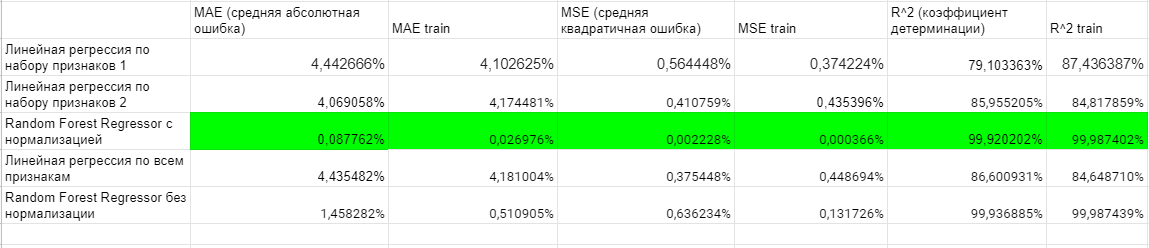

# Выборка 2

## Загрузка данных

Подключаем нужные нам библиотеки для работы, скачиваем датасет

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy as sp
import re
import time
import os
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


Загрузим данные из .csv файла и ознакомимся с данными:

In [ ]:
data = pd.read_csv('StudentsPerformance.csv', encoding='cp1251', low_memory=False)

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


|              	|                                      Данные                                     	|
|:------------:	|:-------------------------------------------------------------------------------:	|
| gender         	| Пол студента                              	|
| race/ethnicity    	| Раса/ этнос                                       	|
| parental level of education     	| Уровень образования родителей                                       	|
| lunch    	| Обед сбыта                                                                 	|
| test preparation course     	| Курс подготовки к тестированию                    	|
| math score   	| Оценка по математике                                                          	|
| reading score 	| Оценка чтения                                                       	|
| writing score      	| Оценка письма                                                	|



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


В данных всего 1000 строк и нет пропущенных

## Предобработка

In [ ]:
data.gender.unique()

array(['female', 'male'], dtype=object)

Стандартно пол только мужской и женский. Закодируем данную переменную

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['gender'])
data['gender'] = le.transform(data['gender'])

female - 0

male - 1

In [ ]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

Это вымышленный набор данных и значения расы А означает воображаемую расу, а не какую-то определенную. Закодируем и эту переменную

In [ ]:
le.fit(data['race/ethnicity'])
data['race/ethnicity'] = le.transform(data['race/ethnicity'])

In [ ]:
data['race/ethnicity'].unique()

array([1, 2, 0, 3, 4])

group A - 0

group B - 1

group C - 2

group D - 3

group E - 4

In [ ]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)


|     Уровень         	|       образования родителей                                                                    	|
|:------------:	|:-------------------------------------------------------------------------------:	|
| bachelor's degree         	| Степень бакалавра      	|
| some college    	| Колледж                                       	|
| master's degree     	| Степень магистра                      	|
| associate's degree    	| Степень ассоциированного специалиста                                          	|
| high school     	| Старшая школа                    	|
| some high school   	| Какая-то старшая школа                                           	|
                                            



In [ ]:
le.fit(data['parental level of education'])
data['parental level of education'] = le.transform(data['parental level of education'])

In [ ]:
data['parental level of education'].unique()

array([1, 4, 3, 0, 2, 5])

associate's degree - 0

bachelor's degree - 1

high school - 2

master's degree - 3

some college - 4

some high school - 5

In [ ]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Обеденная категория напрямую зависит от дохода родителей в США, так как чтоб получить бесплатный обед, ученик должен предоставить справку о низком доходе родителей

In [ ]:
le.fit(data['lunch'])
data['lunch'] = le.transform(data['lunch'])

free/reduced - 0

standard - 1

In [ ]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
le.fit(data['test preparation course'])
data['test preparation course'] = le.transform(data['test preparation course'])

completed - 0

none - 1

associate's degree - 0

bachelor's degree - 1

high school - 2

master's degree - 3

some college - 4

some high school - 5

У них стобалльная система оценок, посмотрим распределение оценок

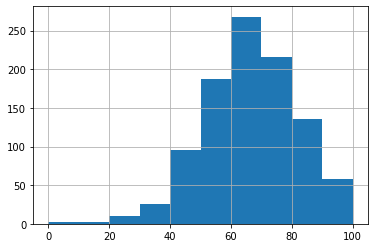

In [ ]:
data['math score'].hist()

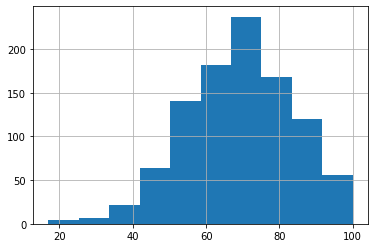

In [ ]:
data['reading score'].hist()

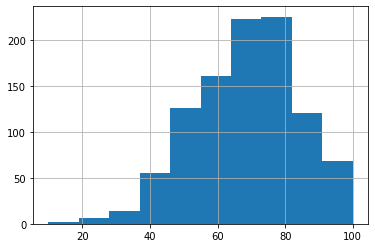

In [ ]:
data['writing score'].hist()

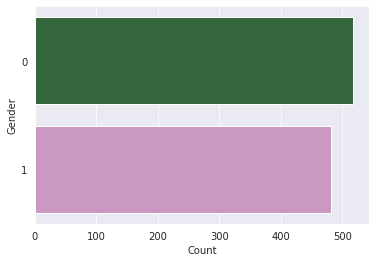

In [ ]:
#распределение полов
sns.set_style('darkgrid')
sns.countplot(y='gender',data=data,palette='cubehelix')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

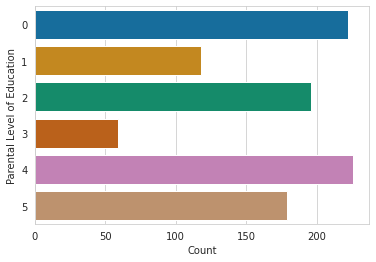

In [ ]:
#распределение уровней образования родителей студентов
sns.set_style('whitegrid')
sns.countplot(y='parental level of education',data=data,palette='colorblind')
plt.xlabel("Count")
plt.ylabel("Parental Level of Education")
plt.show()

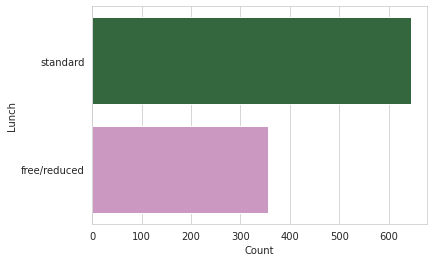

In [ ]:
#распределение видов обедов
sns.set_style('whitegrid')
sns.countplot(y='lunch',data=data,palette='cubehelix')
plt.xlabel("Count")
plt.ylabel("Lunch")
plt.show()

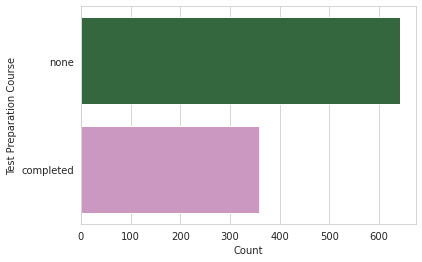

In [ ]:
# распределение уровня подготовки
sns.set_style('whitegrid')
sns.countplot(y='test preparation course',data=data,palette='cubehelix')
plt.ylabel("Test Preparation Course")
plt.xlabel("Count")
plt.show()

## Коллинеарность

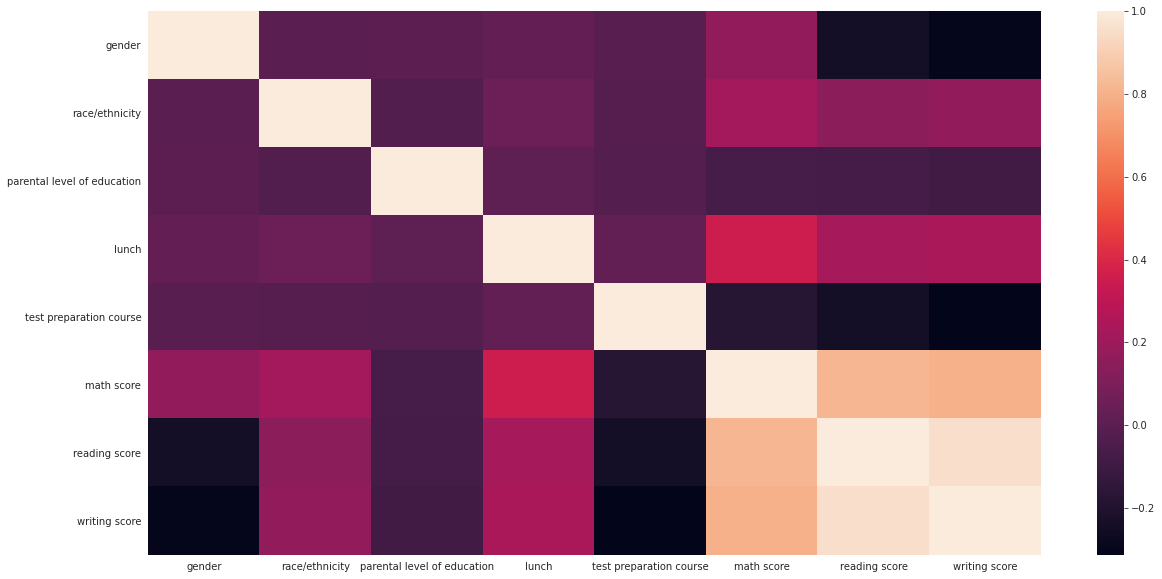

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr())

Чем светлее ячейка, тем больше корреляция между данными. Мы видим, что оценки между собой коррелируют, то есть если ученик хорошо старается в одном предмете, то скорее всего он хорош и в другом.При этом факт пройденности курса подготовки к тестированию почти не коррелирует с оценками, как и гендер в случае с чтением и письмом. 

Выясним, есть ли связь между оценками за каждый экзамен

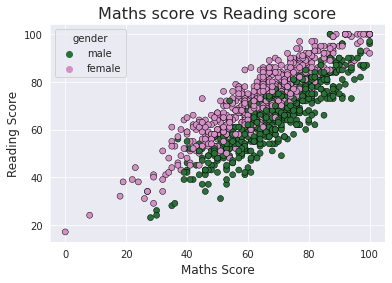

In [ ]:
sns.set_style('darkgrid')
plt.title('Maths score vs Reading score',size=16)
plt.xlabel('Maths Score',size=12)
plt.ylabel('Reading Score',size=12)
sns.scatterplot(x='math score',y='reading score',data =data,hue='gender',edgecolor='black',palette='cubehelix',hue_order=['male','female'])
plt.show()

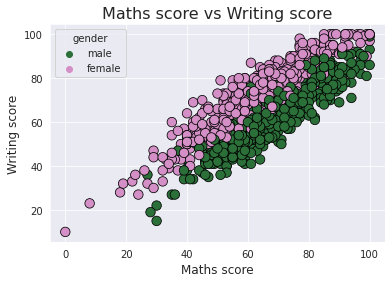

In [ ]:
sns.set_style('darkgrid')
plt.title('Maths score vs Writing score',size=16)
plt.xlabel('Maths score',size=12)
plt.ylabel('Writing score',size=12)
sns.scatterplot(x='math score',y='writing score',data =data,hue='gender',s=90,edgecolor='black',palette='cubehelix',hue_order=['male','female'])
plt.show()

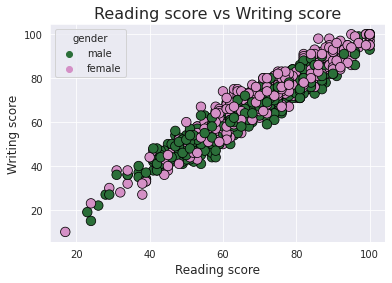

In [ ]:
sns.set_style('darkgrid')
plt.title('Reading score vs Writing score',size=16)
plt.xlabel('Reading score',size=12)
plt.ylabel('Writing score',size=12)
sns.scatterplot(x='reading score',y='writing score',data =data,hue='gender',s=90,edgecolor='black',palette='cubehelix',hue_order=['male','female'])
plt.show()

Оценки учащихся по математике и (чтению и письму) мало разбросаны.
Мы видим, что они следуют восходящей тенденции, то есть если учащийся набрал много баллов по математике, он обычно набирает больше и по другим предметам. 
В то время как оценки по чтению и письму более линейны.

## Выявление важных признаков

Теперь выясним, какие признаки больше всего влияют на оценки

In [ ]:
total_marks = ((data['math score'] + data['reading score'] + data['writing score'])/300)*100 
data['total_marks'] = total_marks
kde_data = data[['math score','reading score','writing score','total_marks']]

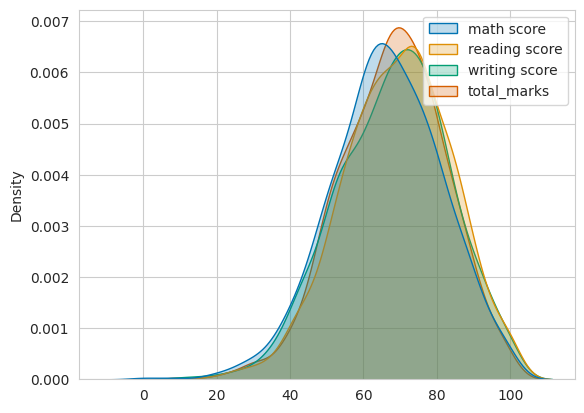

In [ ]:
sns.set_style("whitegrid")
sns.kdeplot(data=kde_data,shade=True,palette='colorblind')
plt.show()

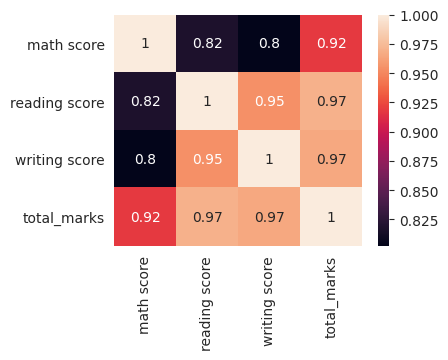

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(data.corr(),annot=True)
plt.show()


Мы видим, что оценка по чтению и письму очень коррелирована, что логично

## Построение модели

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
data_model = data.drop(['math score','reading score','writing score'],axis=1)

In [ ]:
y = data_model['total_marks']
data_model = data_model.drop('total_marks',axis=1)

In [ ]:
data_model = pd.get_dummies(data_model)
data_model

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


Разделим данные на тестовую и обучающую выборки

In [ ]:
x_train,y_train,x_test,y_test = train_test_split(data_model,y,test_size=0.2,random_state=42)

Построим модель линейной регрессии, обучим ее

In [ ]:
model = Ridge()    
model.fit(x_train,x_test)
pred = model.predict(y_train)
train_pred = model.predict(x_train)

Построим модель случайного леса решающих деревьев и найдем важные признаки

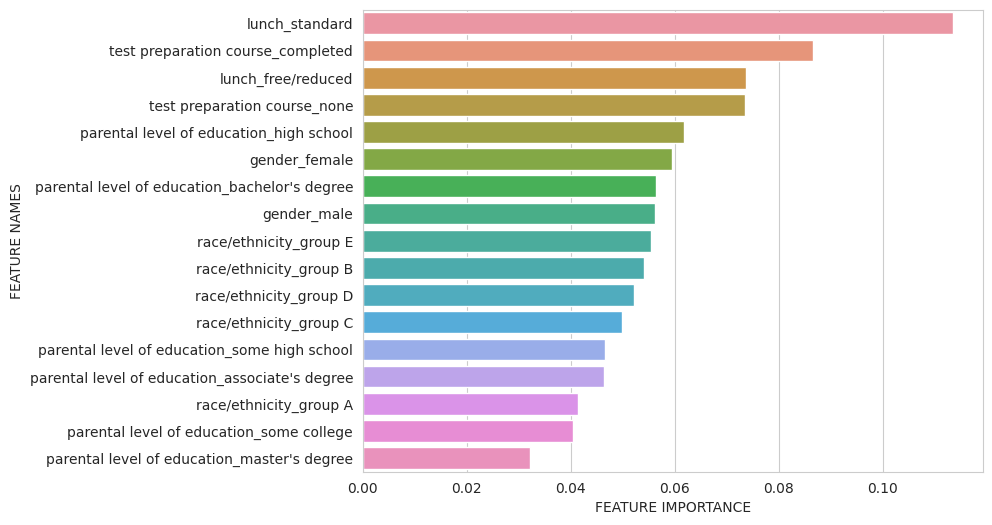

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,x_test)
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(x_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(8,6))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.style.use("ggplot")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

Таким образом, мы видим, что признаки 'type of lunch', 'test preparation status of students', 'parental leveel of education' являются важными признаками при анализировании успеваемости студентов.
